In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


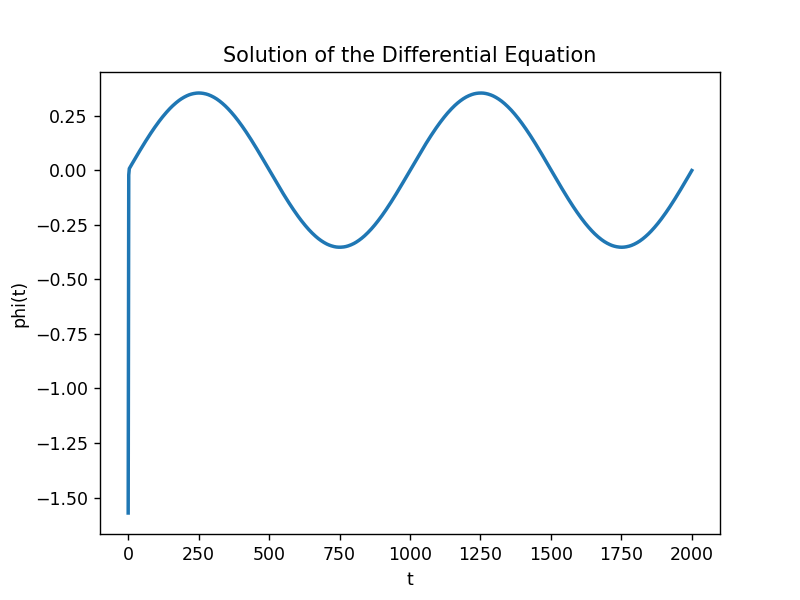

In [3]:
#  Poincare Sections

#Back to our standard problem setup; Need large tMax for this
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the differential equation
def equation(t, y, beta, omega0, gamma, omega):
    phi, phi_prime = y
    dydt = [phi_prime, -2 * beta * phi_prime - omega0**2 * np.sin(phi) + gamma * omega0**2 * np.cos(omega * t)]
    return dydt

# Set the parameters
omega = 2 * np.pi
beta = 1.5 * omega
omega0 = 2 * np.pi
gamma = 1.06

# Set the initial conditions
y0 = [-np.pi/2, 0]

# Set the time span
t_span = [0, 2000]

# Solve the differential equation
sol = solve_ivp(lambda t, y: equation(t, y, beta, omega0, gamma, omega), t_span, y0, method='Radau', dense_output=True)

# Generate time values for plotting
t = np.linspace(t_span[0], t_span[1], 1000)

# Evaluate the solution
phi = sol.sol(t)[0]

# Plot the solution
plt.plot(t, phi, lw=2)
plt.xlabel('t')
plt.ylabel('phi(t)')
plt.title('Solution of the Differential Equation')
plt.show()


<IPython.core.display.Javascript object>


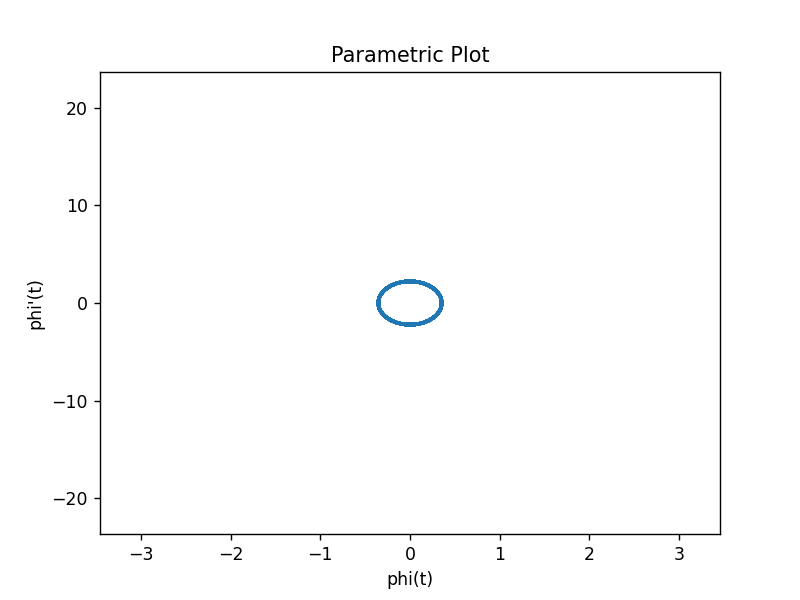

In [5]:
# The solution in state space


# Extract the solution values
t = np.linspace(20, 40, 1000)
phi = sol.sol(t)[0]
phi_prime = sol.sol(t)[1]

# Set the plot range
x_range = (-1.1 * np.pi, 1.1 * np.pi)
y_range = (-1.2 * 2 * np.pi * np.pi, 1.2 * 2 * np.pi * np.pi)

# Plot the parametric plot
plt.plot(phi, phi_prime, lw=2)
plt.xlim(x_range)
plt.ylim(y_range)
plt.xlabel('phi(t)')
plt.ylabel('phi\'(t)')
plt.title('Parametric Plot')
# plt.gca().set_aspect('equal', adjustable='box')
plt.show()


<IPython.core.display.Javascript object>


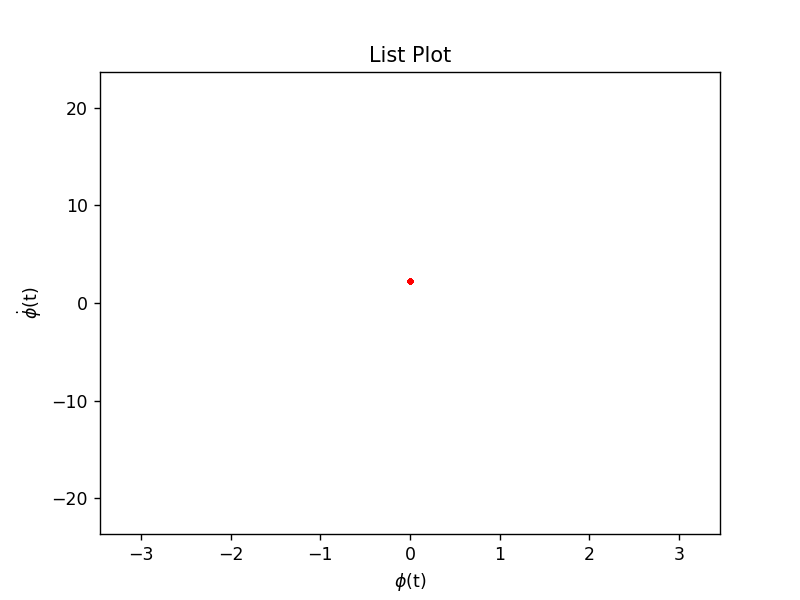

In [9]:
# Now pick a "section" of the state space plot


# Set the time range
t0 = 20
t_max = 2000
times = np.arange(t0, t_max + 1)

# Extract the solution values
phi = sol.sol(times)[0]
phi_prime = sol.sol(times)[1]

# Set the plot range
x_range = (-1.1 * np.pi, 1.1 * np.pi)
y_range = (-1.2 * 2 * np.pi * np.pi, 1.2 * 2 * np.pi * np.pi)

# Plot the list plot
plt.plot(phi, phi_prime, 'ro', markersize=2)
plt.xlim(x_range)
plt.ylim(y_range)
plt.xlabel('$\phi$(t)')
plt.ylabel('$\dot{\phi}$(t)')
plt.title('List Plot')
# plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [ ]:
"""
Look at non-chaotic, then chaotic

Again, the "standard" period doubling cascade. Try these with different values for t0.
(1a) \[Gamma]=1.06 and \[Phi][0]=-\[Pi]/2
(1b) \[Gamma]=1.078 and \[Phi][0]=-\[Pi]/2
(1c) \[Gamma]=1.081 and \[Phi][0]=-\[Pi]/2
(1d) \[Gamma]=1.0826 and \[Phi][0]=-\[Pi]/2 (Expand the plot scale)

Now chaotic driving strength
(2) \[Gamma]=1.09 (Try going to tMax=1000)
(3) \[Gamma]=1.5 and \[Beta]=\[Omega]0/8 (Taylor Fig.12.29; Needs Mod again.) Fractals!
"""